In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
rc('font', family='AppleGothic')



# 데이터 불러오기

In [30]:
submission =pd.read_csv('./titanic/gender_submission.csv')
train = pd.read_csv('./titanic/train.csv')
test = pd.read_csv('./titanic/test.csv')

# EDA

## train 과 test차이?
- survuved 가 없음
- train으로 학습한 후 test 데이터를 넣어서 submission으로 제출하면 되는거구나

In [31]:
print(train.shape)
print(train.columns)
train.info()

(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [32]:
print(test.shape)
print(test.columns)
test.info()

(418, 11)
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## 성별 생존 비교
- 남자의 수가 더 많음에도 불구 하고 여자가 더 많이 생존함
- 성 별 생존자 비율을 보았을 때에도 여자가 압도적으로 높음
### 성별이 생존에 영향을 크게 미침을 알 수 있음

In [33]:
survival = train[train['Survived']==1]
dead = train[train['Survived']==0]

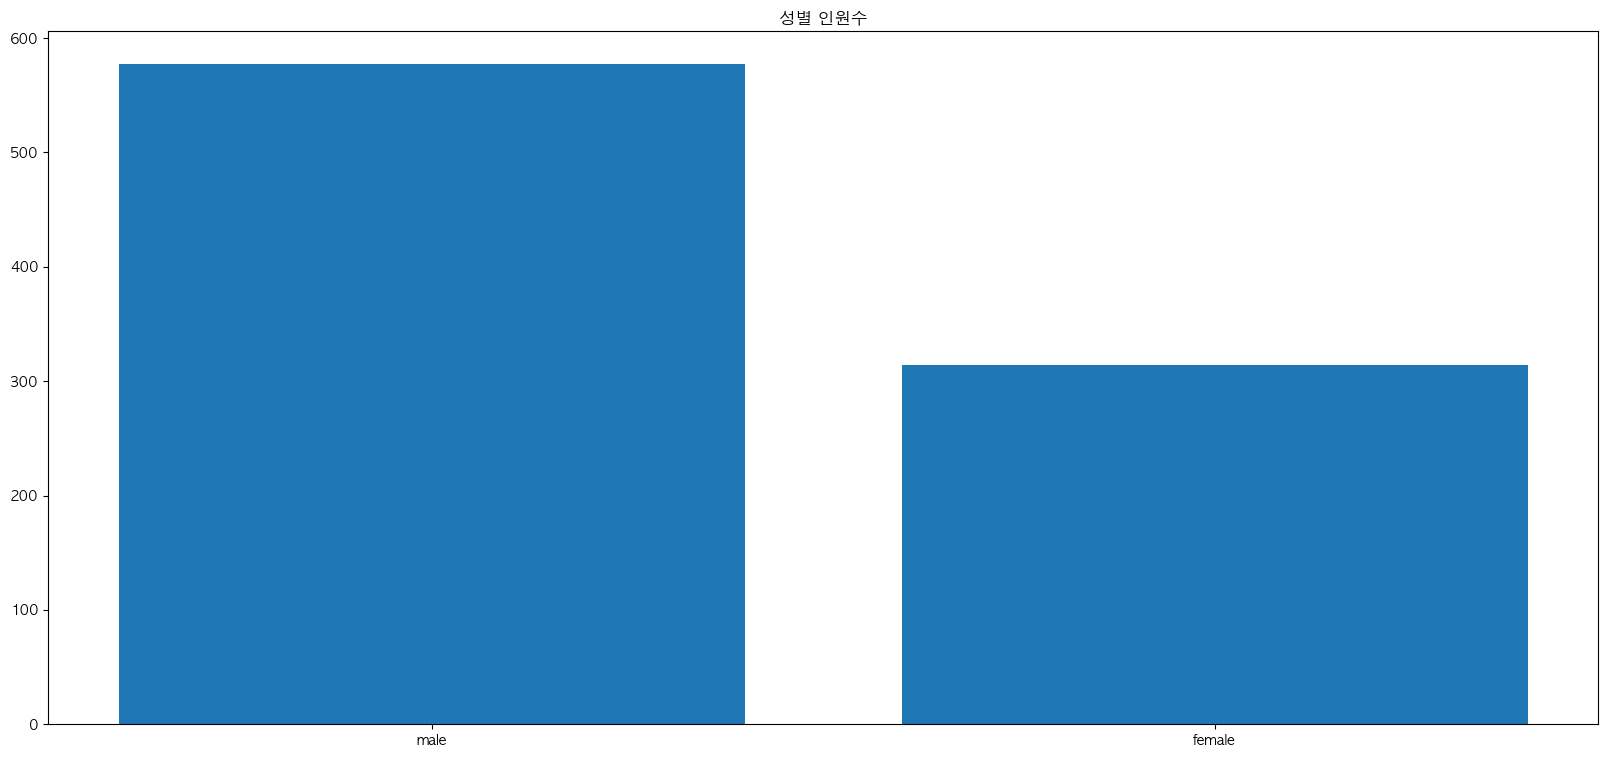

In [34]:
# 성별비교 남자가 약 2배 정도 많음
plt.bar(train['Sex'].unique(),train['Sex'].value_counts())
plt.title('성별 인원수')
plt.show()

Text(0.5, 1.0, '성별 생존비율')

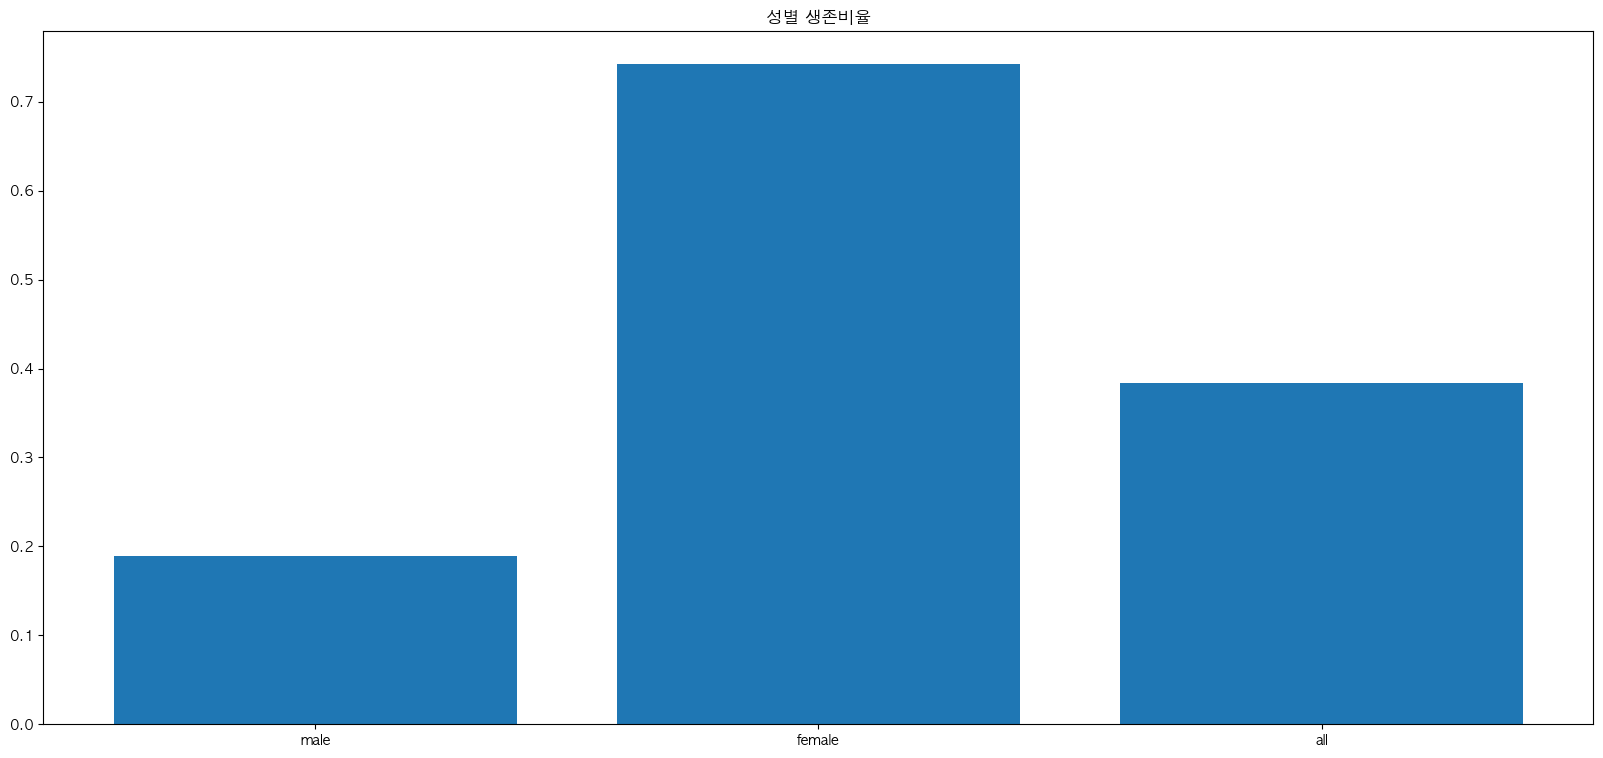

In [35]:
# 남,녀 전체 의 생존확률
male_ratio = len(survival[survival['Sex']=='male'])/len(train[train['Sex']=='male'])
female_ratio = len(survival[survival['Sex']=='female'])/len(train[train['Sex']=='female'])
survival_ratio = len(survival)/len(train)
ratio = [male_ratio,female_ratio,survival_ratio]
x = ['male','female','all']

plt.bar(x,ratio)
plt.title('성별 생존비율')

Text(0.5, 1.0, '생존자의 성별 비율')

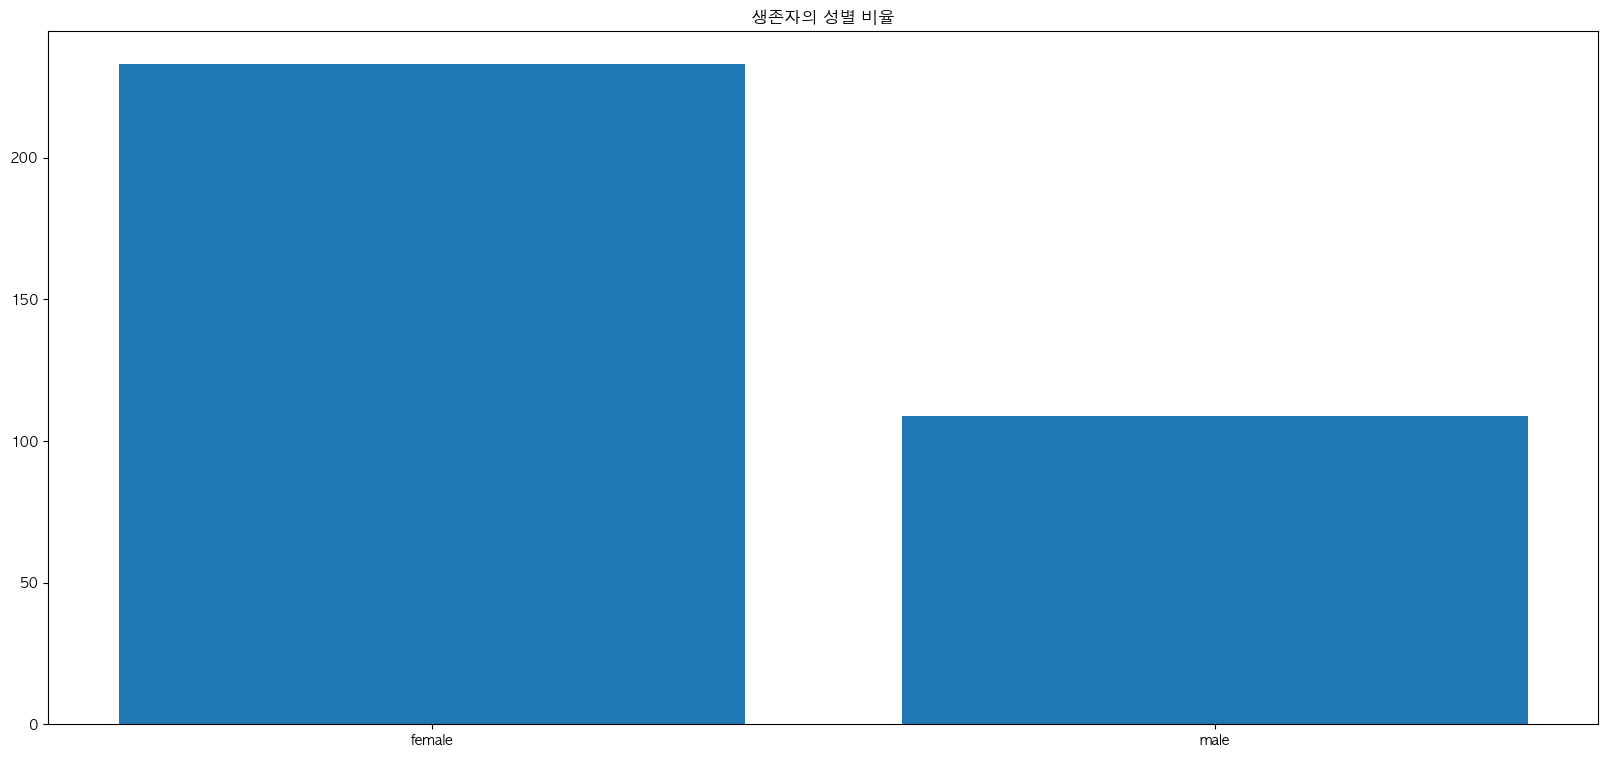

In [36]:
# 생존자의 성별 수
plt.bar(survival['Sex'].unique(), survival['Sex'].value_counts())
plt.title('생존자의 성별 비율')

## 티켓 등급별 사망 비율
### 티켓 등급 또한 생존에 영향을 미침을 보여줌

Text(0.5, 1.0, '티켓 등급별 인원 수')

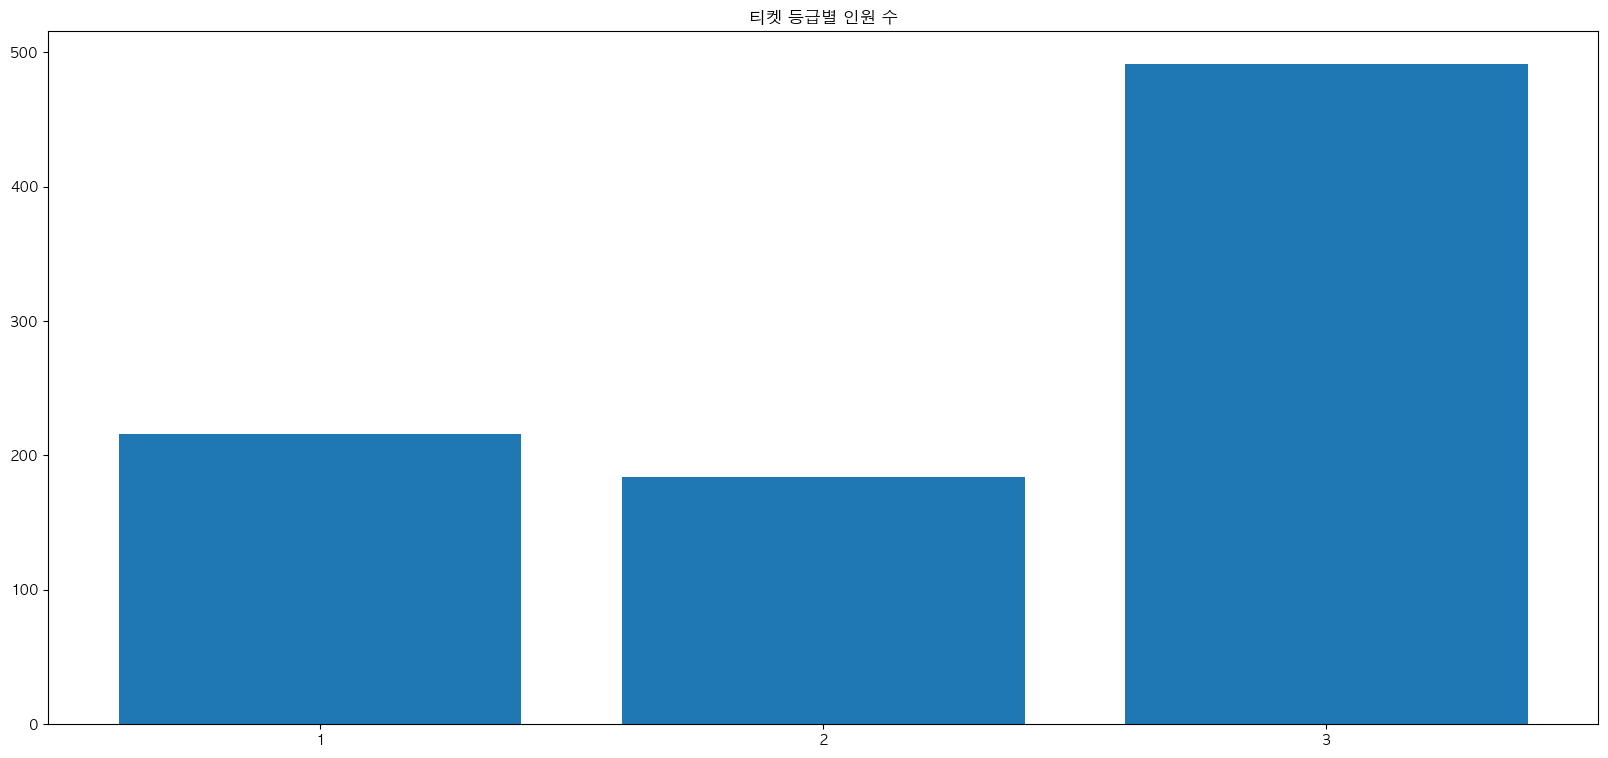

In [37]:
x = train['Pclass'].value_counts()
x = x.sort_index()
x = x.reset_index()
plt.bar(x['index'].astype(str),x['Pclass'])
plt.title('티켓 등급별 인원 수')

Text(0.5, 1.0, '티켓별 생존비율')

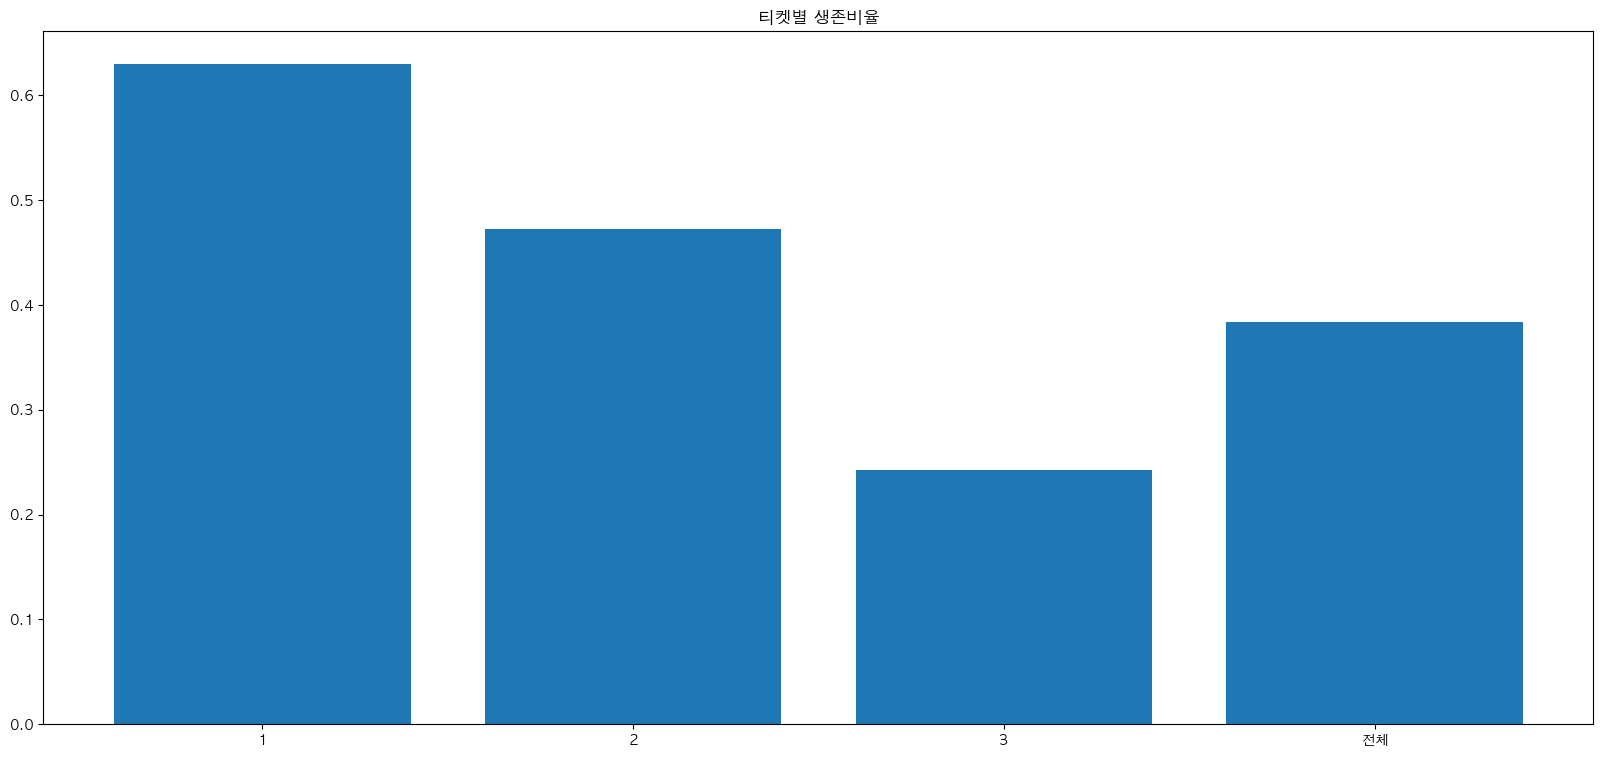

In [38]:
# 티켓별 생존 비율
first_ratio = len(survival[survival['Pclass']==1])/len(train[train['Pclass']==1])
second_ratio = len(survival[survival['Pclass']==2])/len(train[train['Pclass']==2])
third_ratio = len(survival[survival['Pclass']==3])/len(train[train['Pclass']==3])
survival_ratio = len(survival)/len(train)
ratio = [first_ratio,second_ratio,third_ratio,survival_ratio]
x = ['1','2','3','전체']

plt.bar(x,ratio)
plt.title('티켓별 생존비율')


Text(0.5, 1.0, '티켓등급 별 생존자 수')

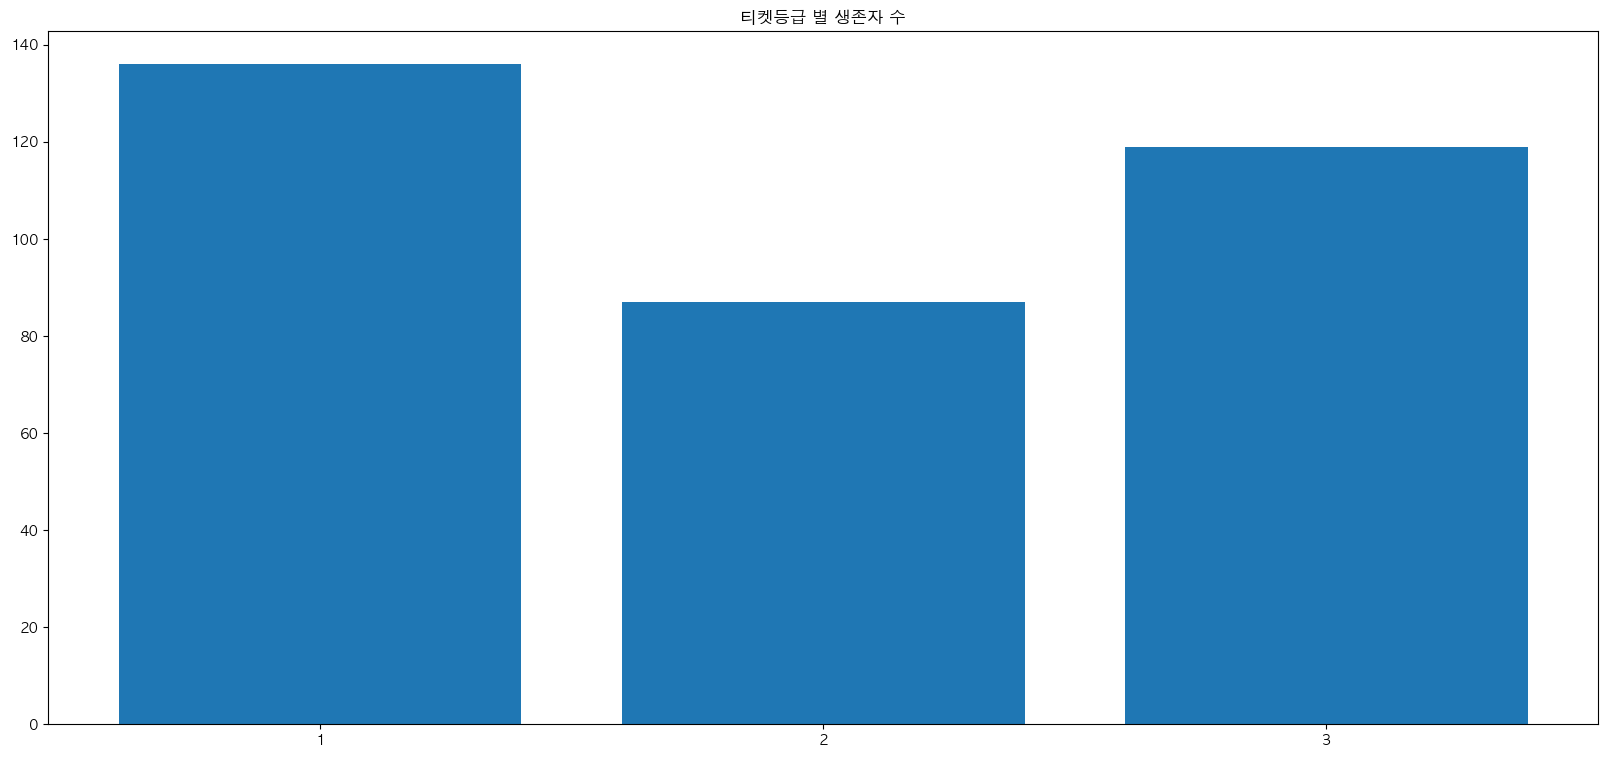

In [39]:
x = survival['Pclass'].value_counts()
x = x.sort_index()
x = x.reset_index()
plt.bar(x['index'].astype(str),x['Pclass'])
plt.title('티켓등급 별 생존자 수')

## 나이대별 생존 비교
- 평균,중위값은 크게 차이가 나지 않음
- 사망자의 경우 나이 분포가 넓음 > 극 고령층의 경우 사망확률이 높음

In [40]:
print('결측치개수', train['Age'].isnull().sum())

결측치개수 177


In [41]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

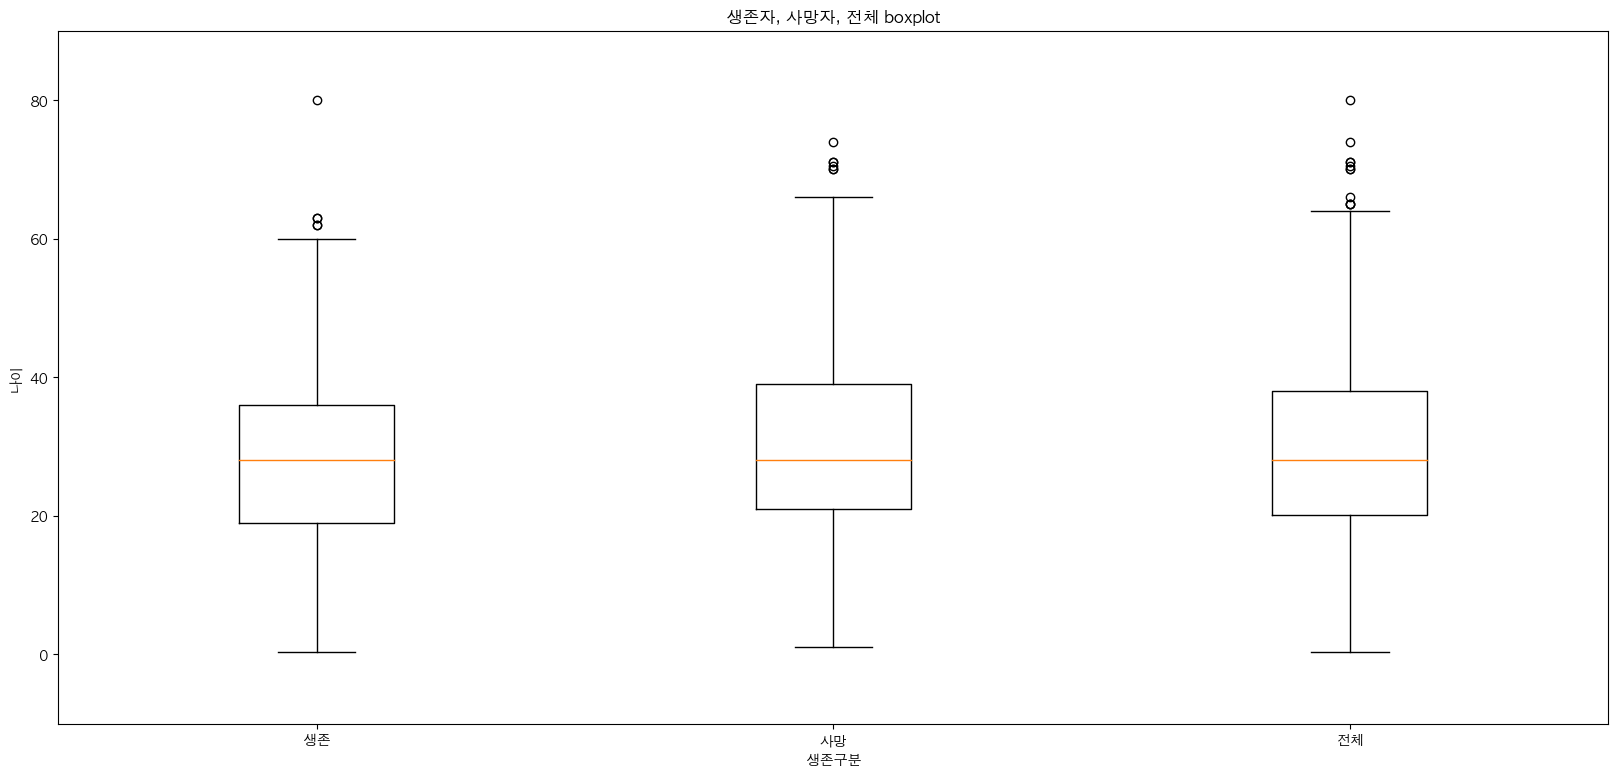

whiskers: [array([19.  ,  0.42]), array([36., 60.]), array([21.,  1.]), array([39., 66.]), array([20.125,  0.42 ]), array([38., 64.])]
medians: [array([28., 28.]), array([28., 28.]), array([28., 28.])]
fliers: [array([63., 63., 62., 80., 62.]), array([71. , 70.5, 71. , 70. , 70. , 74. ]), array([66. , 65. , 71. , 70.5, 65. , 65. , 71. , 80. , 70. , 70. , 74. ])]


In [42]:
fig, ax = plt.subplots()

box = ax.boxplot([survival['Age'].dropna(), dead['Age'].dropna(),train['Age'].dropna()])
ax.set_ylim(-10, 90)
ax.set_xlabel('생존구분')
ax.set_ylabel('나이')
plt.rcParams['figure.figsize'] = (5, 5)
plt.xticks([1,2,3],['생존','사망','전체'])
plt.title('생존자, 사망자, 전체 boxplot')
plt.show()

whiskers = [item.get_ydata() for item in box['whiskers']]
medians = [item.get_ydata() for item in box['medians']]
fliers = [item.get_ydata() for item in box['fliers']]

print('whiskers:', whiskers)
print('medians:', medians)
print('fliers:', fliers)

## 형재 자매 배우자 수
#### 가정
- 형재 자매 배우자가 많을 수록 자신을 희생하여 구하지 않을까?
- 성별, 나이대에 따라서 다른 양상이 나타날 듯

In [43]:
train['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [44]:
train['SibSp2']=train['SibSp'].apply(lambda x: '2이상' if x>=2 else x )
survival['SibSp2']=survival['SibSp'].apply(lambda x: '2이상' if x>=2 else x )
dead['SibSp2']=dead['SibSp'].apply(lambda x: '2이상' if x>=2 else x )

train['SibSp2'].value_counts()

/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_3895/3087399234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survival['SibSp2']=survival['SibSp'].apply(lambda x: '2이상' if x>=2 else x )
/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_3895/3087399234.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dead['SibSp2']=dead['SibSp'].apply(lambda x: '2이상' if x>=2 else x )


0      608
1      209
2이상     74
Name: SibSp2, dtype: int64

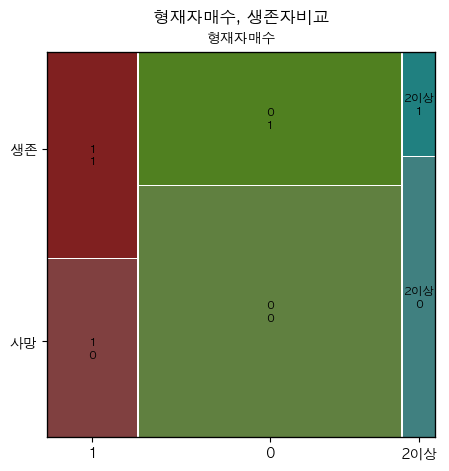

In [45]:
from statsmodels.graphics.mosaicplot import mosaic



mosaic(train,['SibSp2', 'Survived'],
      title='형재자매수, 생존자비교')
plt.yticks([0.75,0.25],['생존','사망'])
plt.xlabel('형재자매수')
plt.show()

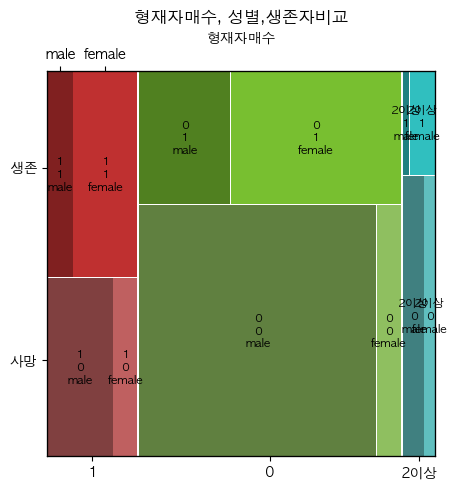

In [46]:
mosaic(train,['SibSp2', 'Survived','Sex'],
      title='형재자매수, 성별,생존자비교')
plt.yticks([0.75,0.25],['생존','사망'])
plt.xlabel('형재자매수')
plt.rcParams["figure.figsize"]=(20, 9)

## 운임 비교
- 생존자의 운임가격이 더 높은 경향을 보임

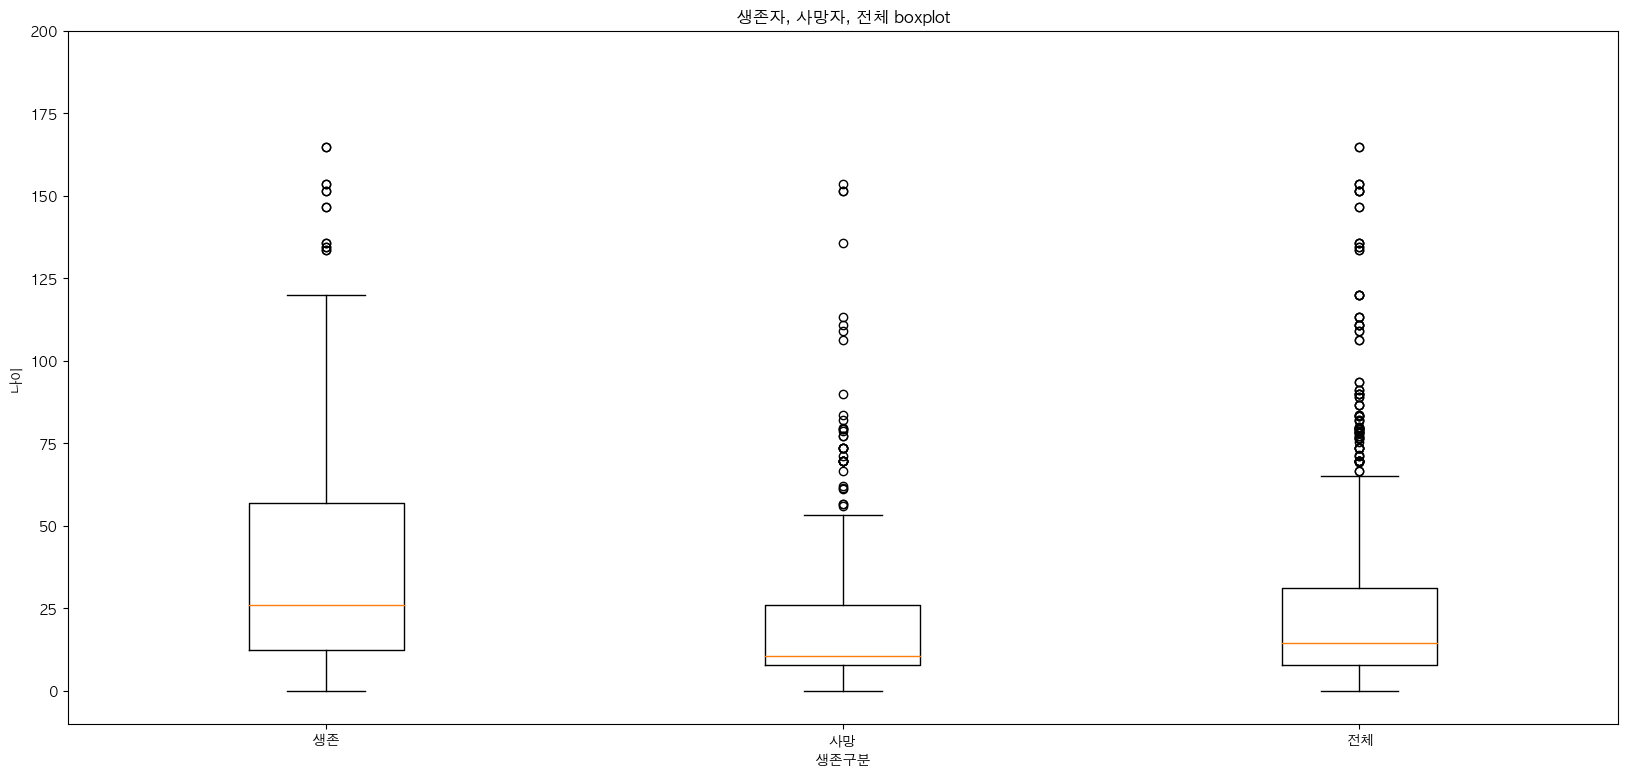

In [47]:
fig, ax = plt.subplots()

box = ax.boxplot([survival['Fare'], dead['Fare'],train['Fare']])
ax.set_ylim(-10, 200)
ax.set_xlabel('생존구분')
ax.set_ylabel('나이')
plt.rcParams['figure.figsize'] = (5, 5)
plt.xticks([1,2,3],['생존','사망','전체'])
plt.title('생존자, 사망자, 전체 boxplot')
plt.show()

## 승선항 비교
- C 승선항이 상대적으로 높은 생존률을 보임

In [48]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

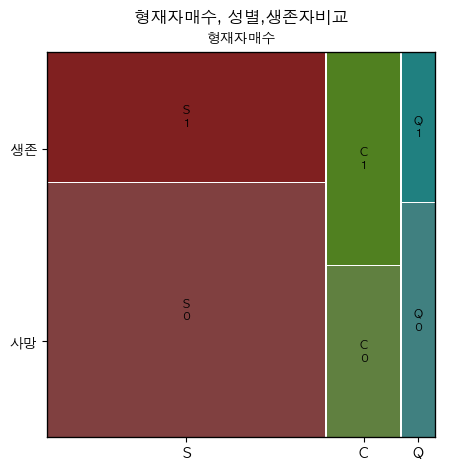

In [49]:
mosaic(train,['Embarked', 'Survived'],
      title='형재자매수, 성별,생존자비교')
plt.yticks([0.75,0.25],['생존','사망'])
plt.xlabel('형재자매수')
plt.rcParams["figure.figsize"]=(20, 9)

# Dataset 생성

## null 값 채우기 > 만약 나이가 Null 이라면 어떻게 채울 것인가?
- 다른 사람과 특성이 비슷한 나이를 찾아서 채우기 >> 유사도 체크해서 채우기??

In [50]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
SibSp2           0
dtype: int64

In [51]:
dataset = pd.concat([train,test])

In [52]:
# Sex, Embarked > 숫자로 변환
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
le_sex = le_sex.fit(dataset['Sex'])
dataset['Sex'] = le_sex.transform(dataset['Sex'])


le_embark = LabelEncoder()
le_embark = le_embark.fit(dataset['Embarked'])   #train['col']을 fit
dataset['Embarked'] = le_embark.transform(dataset['Embarked'])

dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].mean())

In [53]:
agenull = dataset[dataset['Age'].isnull()][['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
agetrue = dataset[dataset['Age'].isnull()==False][['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

In [54]:
dataset.drop(['PassengerId','Age'],axis=1).isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin       1014
Embarked       0
SibSp2       418
dtype: int64

## cosine 유사도
 - agenull과 유사한 상위 10개의 평균 > agenull의 나이

In [57]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(agetrue.drop(['PassengerId','Age'],axis=1),agenull.drop(['PassengerId','Age'],axis=1))
similarity = pd.DataFrame(similarity)

In [58]:
# 첫번째 행 > ageture 의 첫번쨰 행과 agenull 들과의 유사도
# 첫번째 열 > agenull 의 첫번째 행과 agetrue 들과의 유사도
# 각 열별로 큰 순서대로 10개를 찾아서 배열 저장
similarity

,0,1,2,3,4,5,6,7,8,9,...,253,254,255,256,257,258,259,260,261,262
0,0.981851,0.959752,0.954564,0.962285,0.976193,0.992001,0.885314,0.976546,0.962286,0.961843,...,0.897750,0.949921,0.984083,0.961819,0.960253,0.976623,0.976546,0.991724,0.991724,0.930783
1,0.935435,0.976302,0.928746,0.921250,0.932819,0.908308,0.999948,0.930734,0.921333,0.933081,...,0.990927,0.978275,0.924162,0.973073,0.975841,0.930250,0.930734,0.911392,0.911392,0.990495
2,0.986467,0.973002,0.972771,0.964919,0.993539,0.993428,0.912534,0.993705,0.964933,0.966508,...,0.922676,0.956867,0.986689,0.983256,0.973358,0.993739,0.993705,0.993618,0.993618,0.945180
3,0.940351,0.981816,0.929782,0.922278,0.938139,0.917781,0.999148,0.936143,0.922360,0.933965,...,0.991414,0.978722,0.929533,0.978231,0.981415,0.935680,0.936143,0.920701,0.920701,0.990485
4,0.993036,0.976485,0.967099,0.973577,0.987532,0.999972,0.909094,0.987664,0.973585,0.974268,...,0.918906,0.959814,0.994053,0.978043,0.976905,0.987690,0.987664,1.000000,1.000000,0.945928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,0.980850,0.990402,0.969475,0.961651,0.983950,0.973917,0.964536,0.983170,0.961694,0.967614,...,0.976245,0.985415,0.976228,0.995029,0.990422,0.982986,0.983170,0.975325,0.975325,0.985300
1042,0.935705,0.977541,0.927638,0.920151,0.933108,0.909859,0.999920,0.931026,0.920235,0.932063,...,0.991088,0.977500,0.924452,0.973986,0.977092,0.930543,0.931026,0.912919,0.912919,0.989990
1043,0.985862,0.971423,0.972078,0.964232,0.993098,0.993412,0.909546,0.993304,0.964245,0.965633,...,0.920018,0.955026,0.986291,0.981909,0.971793,0.993347,0.993304,0.993549,0.993549,0.942917
1044,0.933979,0.975727,0.927031,0.919549,0.931251,0.906784,0.999974,0.929141,0.919633,0.931516,...,0.990673,0.976500,0.922580,0.972251,0.975259,0.928651,0.929141,0.909895,0.909895,0.989385


In [69]:
idx_arr= []
for i in range(263):
      arr = list(similarity[i].sort_values(ascending=False)[:10].index)
      idx_arr.append(arr)

In [85]:
for i in range(263):
      age = round(agetrue.iloc[idx_arr[i]]['Age'].mean())
      agenull['Age'].iloc[i] = age


/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_3895/2485510305.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agenull['Age'].iloc[i] = age


In [88]:
data = pd.concat([agenull,agetrue])

In [91]:
train_data = pd.merge(data,train['PassengerId'], how='right', on ='PassengerId')
test_data = pd.merge(data,test['PassengerId'], how='right', on ='PassengerId')


# Modeling